In [9]:
import pandas as pd

df=pd.read_table(r'D:\Tracks\Python\All-Machine-Learning\Projects\Watsapp Group Analysis\WhatsApp Chat updated.txt',error_bad_lines=False)
df.columns=["Raw"]
df_new=df['Raw'].str.split(': ', 1, expand=True)
df_new.columns=['Time','Message']
print(df_new.head())
MsgTable=df_new['Time'].str.split('M - ',1,expand=True)
MsgTable.columns=['Timestamp','Name']
MsgTable['Message']=df_new['Message']


b'Skipping line 23886: expected 1 fields, saw 2\nSkipping line 23887: expected 1 fields, saw 2\nSkipping line 23888: expected 1 fields, saw 2\nSkipping line 23890: expected 1 fields, saw 2\nSkipping line 23891: expected 1 fields, saw 2\nSkipping line 24481: expected 1 fields, saw 2\nSkipping line 24483: expected 1 fields, saw 2\nSkipping line 24485: expected 1 fields, saw 2\nSkipping line 24487: expected 1 fields, saw 2\nSkipping line 24489: expected 1 fields, saw 2\nSkipping line 24491: expected 1 fields, saw 2\nSkipping line 24493: expected 1 fields, saw 2\nSkipping line 24495: expected 1 fields, saw 2\nSkipping line 24497: expected 1 fields, saw 2\nSkipping line 24499: expected 1 fields, saw 2\n'


                               Time  \
0  04/07/17, 5:03 PM - Lola Infosys   
1        04/07/17, 5:21 PM - Vishak   
2  04/07/17, 6:23 PM - Lola Infosys   
3        04/07/17, 7:16 PM - Vishak   
4        04/07/17, 7:16 PM - Vishak   

                                             Message  
0  It doesn't matter pussy or asshole or dick hol...  
1                                    <Media omitted>  
2                                      Where are you  
3                                        Indiranagar  
4                              Tat was sarjapur road  


['Lola Infosys' 'Vishak' 'Nagendra' 'hrushikesh ms' 'Theja 2'
 'Arun Bhadardwaj' 'Chatura' 'Bhavan Play' 'Ba' 'Nikil Play' 'Vinay'
 'Anni jss']


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


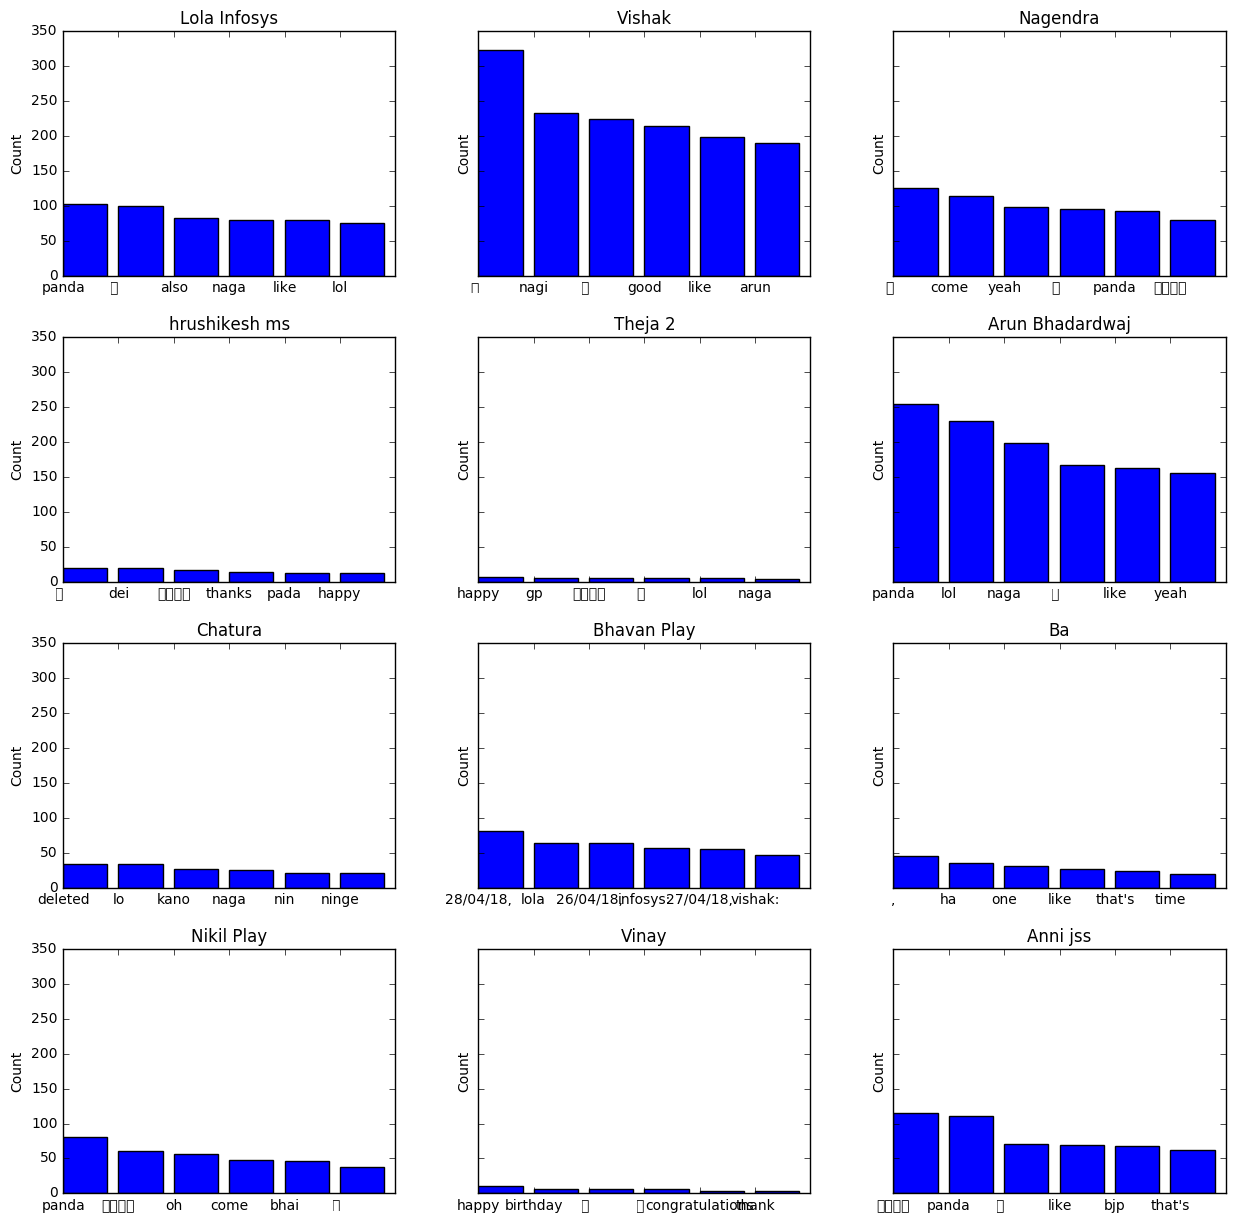

In [10]:
# FInding the most frequently used words by each grop member
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
#import seaborn as sns

MsgTable['Message']=MsgTable['Message'].astype(str)
MsgTable=MsgTable[MsgTable.Name.str.contains("changed" or "removed" or "added")==False]
Names=MsgTable.Name.unique()[0:12]

print(Names)
plot_number=0
fig, axs = plt.subplots(figsize=(15,15), ncols=3, nrows=4,sharey=True)
fig.subplots_adjust(hspace = .25, wspace=.25)
axs = axs.ravel()

for name in Names:
    
    MsgTableTemp=MsgTable.loc[MsgTable['Name']==name]
    MsgList = MsgTableTemp['Message'].tolist()
    

    stop_words = set(stopwords.words('english'))
    WordList=' '.join(MsgTableTemp['Message']).lower().split()
    filtered_WordList = [w for w in WordList if not w in stop_words]


    from collections import Counter
    df = pd.DataFrame.from_dict(dict(Counter(filtered_WordList)), orient='index').reset_index()
    df.columns =['Word','Count']
    DropWords = ['',':)','pm','r','n','ya','ok','?','and','-','u','to','for','with','of','in','..','<omitted','image','<media','omitted>','it','none','i','is','will','the','you']
    df['Word'].replace(DropWords, np.nan, inplace=True)
    df.dropna(subset=['Word'], inplace=True)
    df.sort(['Count'],ascending=False,inplace=True)
    #sns.distplot(df.head(),        kde = False, ax=ax[0][plot_number])
    df['Word'] = df['Word'].astype('str')
    labels=df['Word'].iloc[0:6]
    dd = np.arange(len(labels))
    axs[plot_number].bar(dd,df['Count'].iloc[0:6],label=name)
    #df.iloc[0:10].plot(kind='bar',title=name)
    #plt.xticks(dd,labels)
    #plt.show()
    axs[plot_number].set_ylabel("Count")
    axs[plot_number].set_title(name)
    axs[plot_number].set_xticklabels(labels,fontdict=None, minor=False)
    plot_number = plot_number + 1
plt.show()


# sns.set_style("whitegrid")
# ax = sns.barplot(x="Word", y="Count", data=df.head())
